# Modelling a Support Vector Machine

In this notebook, a basic version of an SVM is implemented. This is only for understanding the inner working of the classifier. By no means is this implementation optimized enough to be applied on a large scale.

# SVM
An SVM model is a representation of the data as points in space, mapped so that the instances of the separate categories are divided by a clear gap that is as wide as possible. In other words, an SVM is a Large Margin Classifier.

In [3]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

**SVM CLASS** It is useful to model an SVM as an object because training an SVM is a computationally expensive task. Therefore, in order to not retrain for every new test data, we build an object. Once trained, the classifier is very quick at predicting the label of new data.

It is recommended to go through more comprehensive resources for understanding the crux of the SVM problem.
SVM Training is a Convex Optimization Problem. As we have already stated, the model attempts to find out the hyperplane causing maximum separation of the classes. Thus, minimizing the margin, when stated mathematically, is a Convex Opt. problem.

In [4]:
class Support_Vector_Machine:
    # initializing the svm class object
    def __init__(self,visualization=True):
        # visualization (bool): whether or not the user wants to visually see the decision boundary hyperplane
        # colors : Setting the colors of different classes. Red for positive class. Blue for negative class.        
        
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    
    #train
    def fit(self,data):
        # data (dict): input datapoints([x0,x1]) with attached class label (1 or -1)
        
        self.data = data
        
        # opt_dict stores the possible [w,b] values for a given magnitude for w 
        # {||w|| : [w,b] }
        opt_dict = {}
        
        # these transforms when applied to w yield same magnitude but possibly lower value of cost function
        transforms = [[1,1],
                      [-1,1],
                      [-1,-1],
                      [1,-1]]
        
        # getting the maximum and the minimum feature value from the given dataset
        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)
                   
        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None
        
        # step sizes to be taken while optimizing the cost function
        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      self.max_feature_value * 0.001,]
        

        b_range_multiple = 5
        # we dont need to take as small steps with b as with w
        b_multiple = 5
        
        # latest_optimum stores the most recent value of the cost function while optimization
        # start with a high value
        latest_optimum = self.max_feature_value * 10
        
        
        # Convex Optimization Loop
        for step in step_sizes:
            # initialize w for the iteration with the latest optimimum value
            w = np.array([latest_optimum,latest_optimum])
            
            # we can do this because convex
            optimized = False
            
            while not optimized:
                # Looping over values of b
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                  self.max_feature_value*b_range_multiple, 
                                  step*b_multiple):
                    
                    # Consider each transformed value of w as w_t
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        
                        # checking if the dataset satisfies the found combination of w_t and b 
                        for i in self.data:
                            for xi in self.data[i]:
                                yi = i
                                
                                # the training datapoints must lie outside the SV margins 
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                         
                        # if valid combination is found, store it
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]
                
                # check if we jumped over the minima
                if w[0]<0:
                    optimized = True
                    print('Optimized a step.')
                else:
                    w = w - step
            
            # optimized for this step size
            # assign the most optimum values obtained for w and b
            norms = sorted([n for n in opt_dict])
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0] + step*2
        
    # predict a test point   
    def predict(self,features):
        # sign(x.w+b) decides the class of the test datapoint
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        
        # if the user wishes to view the svm then plot the test points
        if classification != 0  and self.visualization:
            self.ax.scatter(features[0],features[1],s=200,marker='*',c=self.colors[classification])
        return classification
    
    
    # to visually see the SVM in action
    def visualize(self):
        # plot the training datapoints
        [[self.ax.scatter(x[0],x[1],s=100,color=self.colors[i]) for x in data_dict[i]] for i in data_dict]
        
        # hyperplane = x.w + b
        # v = x.w + b
        # values of v for:
        # psv = 1
        # nsv = -1
        # dec = 0
        
        # returns the y-coordinate(x1) for plotting the point with x0 abcissa
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v)/w[1]
        
        datarange = (self.min_feature_value*0.9,self.max_feature_value*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]
        
        # (w.x+b) = 1
        # positive support vector hyperplane
        psv1 = hyperplane(hyp_x_min,self.w,self.b,1)
        psv2 = hyperplane(hyp_x_max,self.w,self.b,1)
        self.ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2],'k')
        
        # (w.x+b) = -1
        # negative support vector hyperplane
        nsv1 = hyperplane(hyp_x_min,self.w,self.b,-1)
        nsv2 = hyperplane(hyp_x_max,self.w,self.b,-1)
        self.ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2],'k')
        
        # (w.x+b) = 0
        # decision boundary hyperplane
        db1 = hyperplane(hyp_x_min,self.w,self.b,0)
        db2 = hyperplane(hyp_x_max,self.w,self.b,0)
        self.ax.plot([hyp_x_min,hyp_x_max],[db1,db2],'y--')
        
        plt.show()

In [5]:
# input dataset
data_dict = {
    -1: np.array([[1,7],
                  [2,8],
                  [3,8]]),
    1: np.array([[5,1],
                 [6,-1],
                 [7,3]])
}

In [6]:
# train the model
svm = Support_Vector_Machine()
svm.fit(data=data_dict)

Optimized a step.
Optimized a step.
Optimized a step.


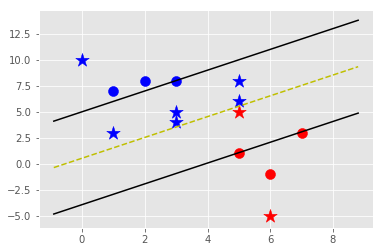

In [7]:
# predicting new unseen data
predict_us = [[0,10],
             [1,3],
             [3,4],
             [3,5],
             [5,5],
             [5,6],
             [6,-5],
             [5,8]]

for p in predict_us:
    svm.predict(p)
    
svm.visualize()    